In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('FuelConsumption.csv')

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [13]:
from scipy.stats import skew
from scipy.stats import stats

<Axes: ylabel='Count'>

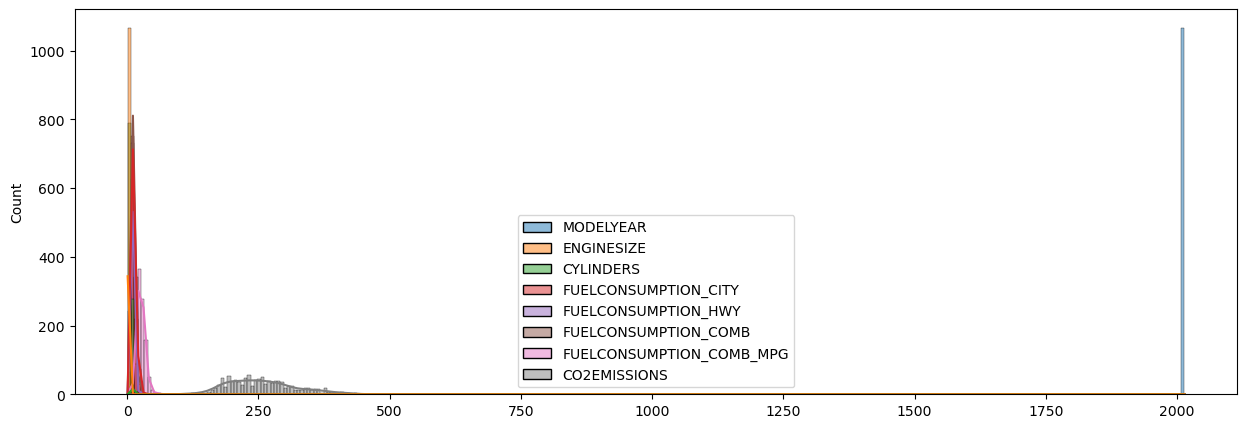

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(df,kde=True)

<Axes: >

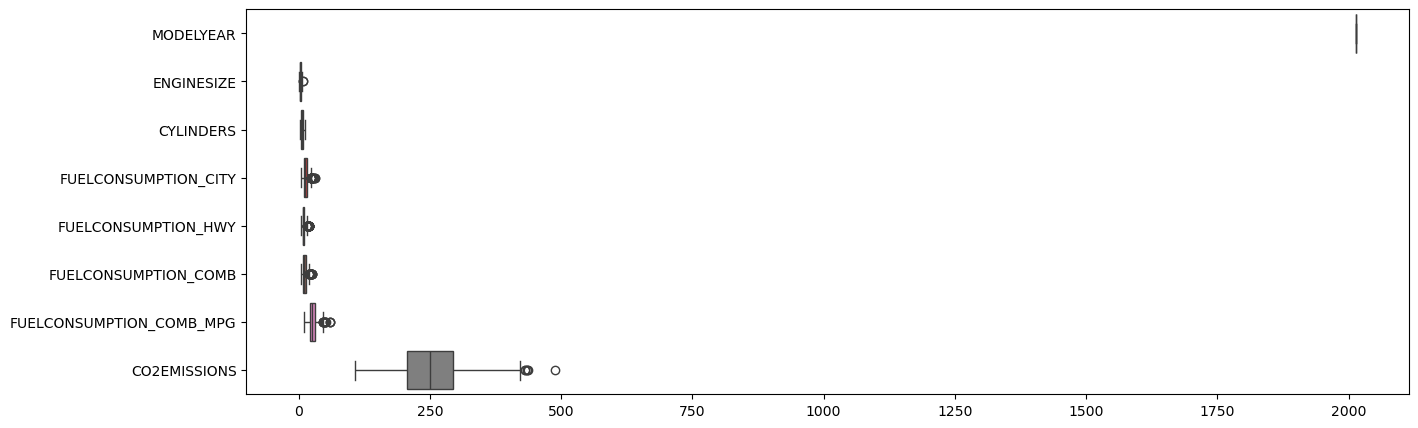

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(df ,orient='h' )

In [17]:
print(skew(df['CO2EMISSIONS']))

0.5187840084529483


In [18]:
df['CO2EMISSIONS']=np.log1p(df['CO2EMISSIONS'])

In [19]:
print(skew(df['CO2EMISSIONS']))

-0.08210211219266615


In [20]:
print(skew(df['FUELCONSUMPTION_COMB_MPG']))

0.5845855433540207


In [21]:
from scipy.stats import boxcox

In [22]:
df['FUELCONSUMPTION_COMB_MPG'] , fitt = boxcox(df['FUELCONSUMPTION_COMB_MPG']+1)

In [31]:
print(skew(df['FUELCONSUMPTION_COMB_MPG']))

-0.003934935839270572


In [33]:
colration_matrix =df[['CO2EMISSIONS','FUELCONSUMPTION_COMB', 'ENGINESIZE','CYLINDERS']].corr()

<Axes: >

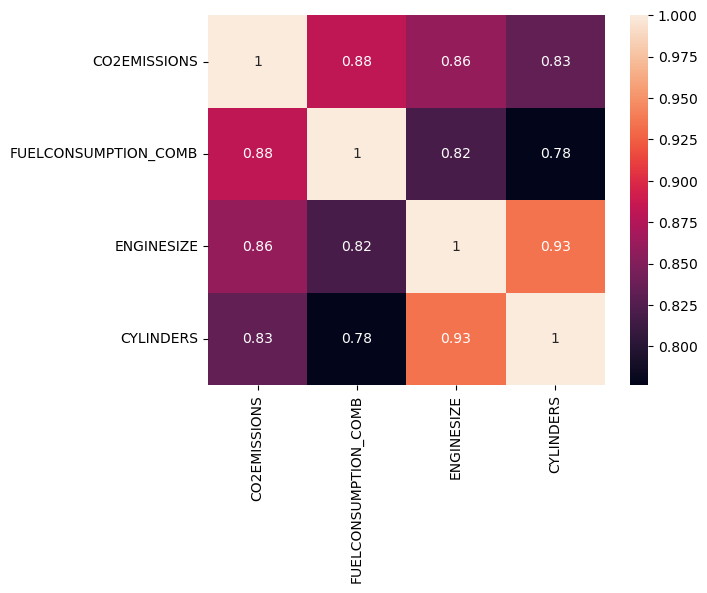

In [35]:
sns.heatmap(colration_matrix , annot=True)

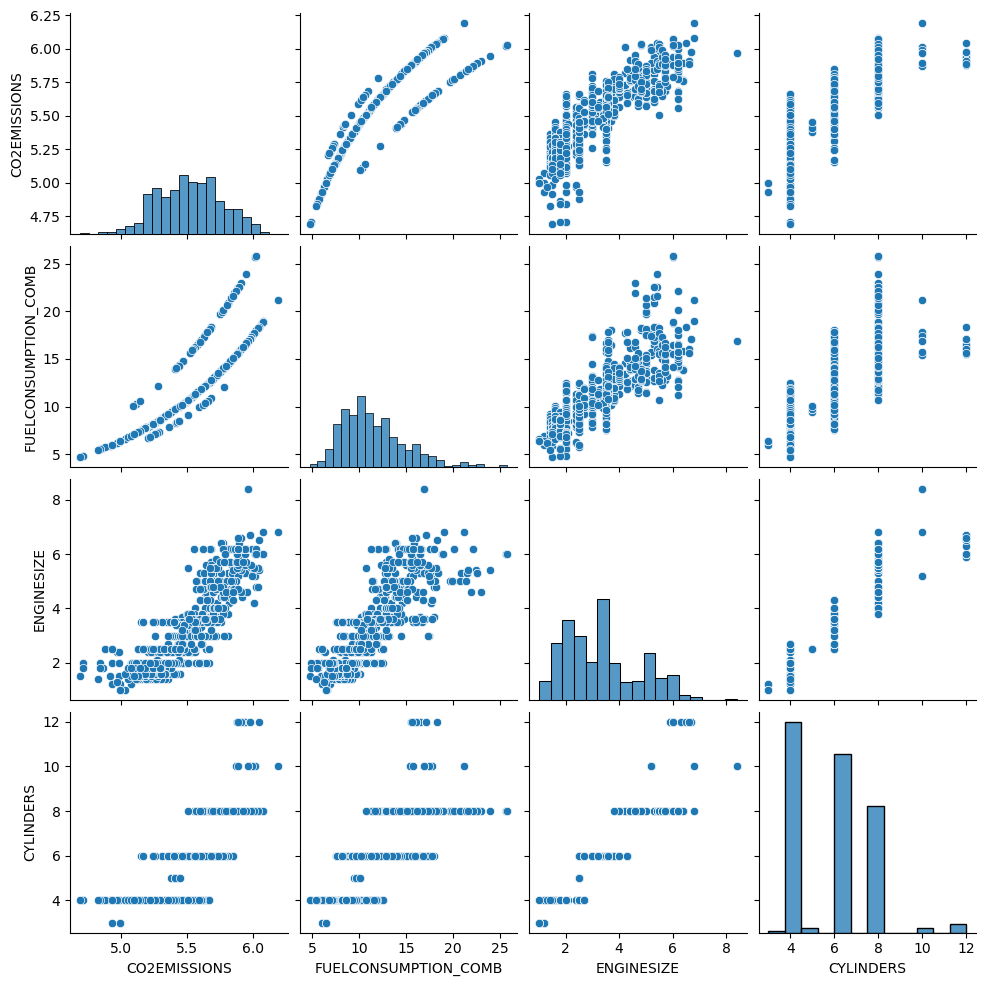

In [37]:
sns.pairplot(df[['CO2EMISSIONS','FUELCONSUMPTION_COMB', 'ENGINESIZE','CYLINDERS']])
plt.show()

In [38]:
df=df.drop(columns=['ENGINESIZE'])

In [39]:
Q1 = np.percentile(df['CO2EMISSIONS'],25)
Q3= np.percentile(df['CO2EMISSIONS'] ,75)
IQR= Q3-Q1

In [40]:
lower_band=  Q1- IQR*1.5 
upper_band =  Q3+IQR*1.5 

In [45]:
outliers = df[(df['CO2EMISSIONS']<lower_band) | (df['CO2EMISSIONS']>upper_band)]

In [47]:
outliers

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
487,2014,HONDA,ACCORD HYBRID,MID-SIZE,4,AV,X,4.7,4.9,4.8,7.546573,4.709530
987,2014,TOYOTA,PRIUS,MID-SIZE,4,AV,X,4.7,4.9,4.8,7.546573,4.709530
988,2014,TOYOTA,PRIUS c,COMPACT,4,AV,X,4.6,4.9,4.7,7.597326,4.691348


In [49]:
df.loc[outliers.index , 'CO2EMISSIONS']= np.nan
df=df.dropna()

In [51]:
from sklearn.preprocessing import StandardScaler

In [117]:
x=df[['CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']].values
y=df['CO2EMISSIONS'].values

In [119]:
std = StandardScaler()

In [121]:
x=std.fit_transform(x)

In [123]:
y=y/max(y)

In [125]:
from sklearn.model_selection import train_test_split

In [127]:
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size=0.2 , random_state=42)

In [129]:
from sklearn.linear_model import LinearRegression

In [131]:
lin = LinearRegression()

In [133]:
lin.fit(x_train,y_train)

LinearRegression()

In [135]:
print(lin.coef_)

print('   ')
print(lin.intercept_)

[ 0.0101696  -0.01822166 -0.04612464]
   
0.8917720136116364


In [137]:
pred= lin.predict(x_test)

In [139]:
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
import math

In [141]:
mse=mean_squared_error(y_test,pred)
mae=mean_absolute_error(y_test , pred)
r2=r2_score(y_test,pred)


In [143]:
print(mse)
print(mae)
print(r2)

0.0001261137092303583
0.00708801251602824
0.9181225819301826


In [145]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [147]:
lasso= Lasso()

In [149]:
param_grid = {'alpha':[0.001,0.01,0.1,0.5,1,5,10]}

In [151]:
grid= GridSearchCV(lasso , param_grid,scoring='r2' , cv=5)

In [153]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10]},
             scoring='r2')

In [155]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.8964588029595429


In [157]:
best_model=grid.best_estimator_

In [159]:
y_pred=best_model.predict(x_test)

In [161]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test , y_pred)
r2=r2_score(y_test,y_pred)


In [163]:
print(mse)
print(mae)
print(r2)

0.00015151666056521665
0.008967230602273588
0.9016301000315474
